In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-feb-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-feb-2021/train.csv
/kaggle/input/tabular-playground-series-feb-2021/test.csv


In [4]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpfxh3ifhc
  JVM stdout: /tmp/tmpfxh3ifhc/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpfxh3ifhc/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_unknownUser_jflcwm
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [5]:
from h2o.automl import H2OAutoML
df=h2o.import_file('../input/tabular-playground-series-feb-2021/train.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
df.describe()

Rows:300000
Cols:26




,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
type,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,1.0,,,,,,,,,,,-0.0935053605494934,-0.05510510604124358,-0.060273722047293136,0.134759847969958,0.1892162896094102,-0.08724666205275422,0.04395333547998903,0.208702695813967,0.0040413881188804965,0.07303994468802598,0.05964379697365727,0.06416121456886681,-0.005599995243532052,0.1581209416491528,0.0
mean,250018.57694666655,,,,,,,,,,,0.5246337889579112,0.5066489298965811,0.4441147266972746,0.44621410031382225,0.455471435022592,0.5083365865959677,0.47834521724823736,0.45590421004319526,0.4593209938362162,0.5268991427134643,0.5049429014471064,0.5299381007216203,0.5245492482499113,0.5033490280100938,7.4562604843775215
maxs,499999.0,,,,,,,,,,,1.0526659962511695,0.8517463756887422,1.017689218794784,1.0064686767643836,0.99405006844277,1.0444334609434376,1.0933115079080815,1.0365405027180288,1.0141555568663891,0.972091451642019,1.0297733408942442,1.0380489331495786,0.9613704166821866,0.8735786265984621,10.309207506292545
sigma,144450.15001006698,,,,,,,,,,,0.20487461060359702,0.23526947913932858,0.20008852378638267,0.23866904095996377,0.20069508269783412,0.2316121906463338,0.1924322851394594,0.2044927141666986,0.22064161702523627,0.2040250519978054,0.20154887097955274,0.23085996374354928,0.22089178925361552,0.2252176584539366,0.8872947048404479
zeros,0,,,,,,,,,,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,A,B,A,A,B,D,A,E,C,I,0.9231905532961956,0.6849683209193232,0.12445359136827933,0.2178862997233316,0.2814212891113367,0.8811221447083947,0.4216503694548104,0.7414131470380283,0.8957994783149412,0.8024605621118054,0.7244167511375598,0.7019154376947166,0.8776181954988187,0.7199028510670258,6.994022554611728
1,2.0,B,A,A,A,B,B,A,E,A,F,0.4376273493011995,0.014213022361150438,0.3574379809777704,0.8461267049747274,0.2823539978698745,0.4400106876739779,0.3462296232318922,0.2784948726175908,0.593413297150756,0.5460562232934362,0.6132521355858089,0.7412892342594564,0.32667869612242706,0.8084643570851451,8.071256056994837
2,3.0,A,A,A,C,B,D,A,B,C,N,0.7322085684360234,0.7601220397848099,0.4546439356312624,0.8129903217977429,0.2937562691270103,0.9141547023946132,0.3696015902215768,0.8325644700649786,0.8656196934768817,0.8252514470475938,0.2641037582107835,0.6955613880926892,0.8691325356777109,0.8283516037771875,5.760455653644145


In [7]:
df_train,df_test,df_valid = df.split_frame(ratios=[.9, .05])
df_train
# train set would have 90 % of the data , test and validation set both would have 5 % of the data

id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
1,A,B,A,A,B,D,A,E,C,I,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.42165,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.99402
2,B,A,A,A,B,B,A,E,A,F,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.34623,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.07126
3,A,A,A,C,B,D,A,B,C,N,0.732209,0.760122,0.454644,0.81299,0.293756,0.914155,0.369602,0.832564,0.86562,0.825251,0.264104,0.695561,0.869133,0.828352,5.76046
6,A,B,A,A,B,B,A,E,C,F,0.486063,0.639349,0.496212,0.354186,0.279105,0.3826,0.70594,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.86897
7,A,A,A,C,B,B,A,E,E,B,0.319723,0.741507,0.648946,0.434844,0.280691,0.24556,0.217362,0.606298,0.345282,0.351235,0.37194,0.222782,0.279227,0.7736,7.06065
9,B,A,B,C,B,B,A,E,C,L,0.348204,0.619819,0.550846,0.182465,0.784294,0.36313,0.349324,0.252734,0.47417,0.434062,0.729585,0.575455,0.695125,0.22431,8.10011
10,A,B,B,A,B,D,A,E,E,F,0.920995,0.486993,0.244655,0.196558,0.278993,0.949677,0.532924,0.72231,0.924495,0.812624,0.594173,0.884272,0.816702,0.777538,8.18024
11,A,B,A,C,B,D,A,E,E,G,0.853132,0.353198,0.189864,0.249299,0.281267,0.825722,0.626083,0.310801,0.94405,0.491695,0.562309,0.555027,0.615598,0.484117,6.58976
12,A,B,A,A,B,D,A,E,C,H,0.126257,0.746892,0.550758,0.340954,0.279607,0.611234,0.59924,0.350437,0.312296,0.556574,0.61143,0.656143,0.682781,0.677183,7.58932
13,A,A,B,C,B,B,A,E,C,K,0.518279,0.637879,0.631165,0.33856,0.459018,0.204111,0.786168,0.359418,0.408637,0.407619,0.472435,0.433475,0.340518,0.283809,7.0307


In [8]:
y = "target"
x = df.columns
x.remove(y)
x.remove("id")


In [9]:
aml = H2OAutoML(max_models = 10, seed = 10, verbosity="info", nfolds=0)


aml.train(x = x, y = y, training_frame = df_train, validation_frame=df_valid)



AutoML progress: |
06:16:39.756: Project: AutoML_20210228_61639752
06:16:39.757: Cross-validation disabled by user: no fold column nor nfolds > 1.
06:16:39.757: Setting stopping tolerance adaptively based on the training frame: 0.0019239380496073202
06:16:39.758: Build control seed: 10
06:16:39.758: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
06:16:40.557: training frame: Frame key: automl_training_py_2_sid_b2d3    cols: 26    rows: 242999  chunks: 16    size: 31341918  checksum: -5995321792919092826
06:16:40.557: validation frame: Frame key: py_4_sid_b2d3    cols: 26    rows: 14818  chunks: 16    size: 2019361  checksum: 2395487047108591128
06:16:40.575: leaderboard frame: Frame key: automl_leaderboard_py_2_sid_b2d3    cols: 26    rows: 27159  chunks: 16    size: 3605308  checksum: -7408757439974063692
06:16:40.576: blending frame: NULL
06:16:40.576: response co

In [10]:
lb = aml.leaderboard
lb.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_1_AutoML_20210228_061639,0.721945,0.849673,0.721945,0.709567,0.103072
GBM_2_AutoML_20210228_061639,0.72215,0.849794,0.72215,0.709631,0.103084
GBM_3_AutoML_20210228_061639,0.723047,0.850322,0.723047,0.710078,0.103148
XGBoost_3_AutoML_20210228_061639,0.723134,0.850373,0.723134,0.70941,0.103137
GBM_5_AutoML_20210228_061639,0.724545,0.851202,0.724545,0.709712,0.103227
GBM_4_AutoML_20210228_061639,0.726165,0.852153,0.726165,0.710644,0.103355
DRF_1_AutoML_20210228_061639,0.73912,0.859721,0.73912,0.716522,0.104254
XGBoost_1_AutoML_20210228_061639,0.749898,0.865966,0.749898,0.719839,0.104919
GLM_1_AutoML_20210228_061639,0.752111,0.867243,0.752111,0.720802,0.105257
XGBoost_2_AutoML_20210228_061639,0.854763,0.924534,0.854763,0.757482,0.111728


In [11]:
aml.leader.model_performance(df_test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.7145689107631419
RMSE: 0.8453217794207966
MAE: 0.7063735175116266
RMSLE: 0.10242241355821548
Mean Residual Deviance: 0.7145689107631419


In [12]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids

['GBM_1_AutoML_20210228_061639',
 'GBM_2_AutoML_20210228_061639',
 'GBM_3_AutoML_20210228_061639',
 'XGBoost_3_AutoML_20210228_061639',
 'GBM_5_AutoML_20210228_061639',
 'GBM_4_AutoML_20210228_061639',
 'DRF_1_AutoML_20210228_061639',
 'XGBoost_1_AutoML_20210228_061639',
 'GLM_1_AutoML_20210228_061639',
 'XGBoost_2_AutoML_20210228_061639']

In [13]:
out=h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

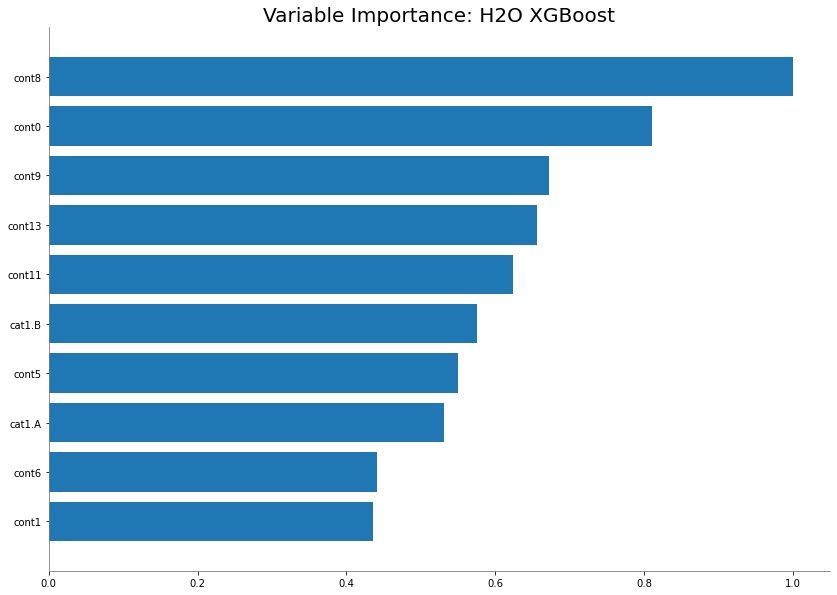

In [14]:
out.varimp_plot()



In [15]:
testdf=h2o.import_file('../input/tabular-playground-series-feb-2021/test.csv')


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
testdf.head()
id_col=testdf['id']
testdf=testdf[:,1:]
testdf.head()

cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
A,B,A,C,B,D,A,E,E,G,0.331261,0.551131,0.486284,0.156058,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
A,B,A,C,B,D,A,E,C,L,0.402404,0.617546,0.296852,0.18744,0.27748,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
A,B,A,C,B,D,A,E,C,F,0.530677,0.618126,0.760865,0.199872,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
A,A,B,A,B,D,A,E,E,F,0.439653,0.487403,0.715786,0.192808,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.58908,0.311625
A,B,A,A,B,B,A,E,E,I,0.389844,0.75276,0.315269,0.191734,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.28586,0.794931
A,A,A,C,B,B,A,E,C,A,0.387531,0.697697,0.417614,0.188274,0.452871,0.226598,0.691911,0.24465,0.345953,0.225896,0.698854,0.304095,0.335822,0.737444
A,B,A,C,B,D,A,E,C,K,0.368736,0.639174,0.312538,0.555308,0.27806,0.742574,0.362563,0.55019,0.404149,0.347697,0.838852,0.654562,0.614094,0.79799
A,B,B,A,B,B,A,E,E,M,0.32526,0.488326,0.473784,0.379342,0.424205,0.217008,0.235191,0.655189,0.325147,0.337095,0.303026,0.306567,0.35036,0.81749
A,B,A,C,B,B,A,E,D,O,0.55404,0.118346,0.499098,0.802519,0.726586,0.379403,0.390793,0.534797,0.30172,0.293707,0.341119,0.157693,0.331178,0.271294
A,A,A,A,B,B,A,E,C,K,0.502385,0.117883,0.41233,0.497296,0.753891,0.439589,0.399967,0.23244,0.490757,0.533921,0.622042,0.334388,0.248404,0.228589


In [17]:
_pred=aml.leader.predict(testdf)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [18]:
_pred=h2o.as_list(_pred, use_pandas=False)

In [19]:

id_col= h2o.as_list(id_col, use_pandas=False)
print(type(id_col))
id_col

<class 'list'>


[['id'],
 ['0'],
 ['5'],
 ['15'],
 ['16'],
 ['17'],
 ['19'],
 ['20'],
 ['21'],
 ['23'],
 ['29'],
 ['31'],
 ['32'],
 ['33'],
 ['34'],
 ['35'],
 ['37'],
 ['38'],
 ['39'],
 ['40'],
 ['44'],
 ['49'],
 ['53'],
 ['56'],
 ['60'],
 ['61'],
 ['63'],
 ['64'],
 ['66'],
 ['70'],
 ['71'],
 ['72'],
 ['75'],
 ['76'],
 ['78'],
 ['85'],
 ['86'],
 ['89'],
 ['90'],
 ['92'],
 ['93'],
 ['94'],
 ['100'],
 ['101'],
 ['102'],
 ['105'],
 ['106'],
 ['107'],
 ['108'],
 ['109'],
 ['112'],
 ['113'],
 ['116'],
 ['117'],
 ['118'],
 ['120'],
 ['129'],
 ['130'],
 ['132'],
 ['133'],
 ['134'],
 ['136'],
 ['137'],
 ['141'],
 ['142'],
 ['152'],
 ['154'],
 ['156'],
 ['160'],
 ['161'],
 ['166'],
 ['170'],
 ['173'],
 ['174'],
 ['175'],
 ['179'],
 ['182'],
 ['186'],
 ['188'],
 ['189'],
 ['191'],
 ['193'],
 ['194'],
 ['195'],
 ['196'],
 ['197'],
 ['199'],
 ['200'],
 ['202'],
 ['203'],
 ['204'],
 ['206'],
 ['207'],
 ['212'],
 ['217'],
 ['218'],
 ['220'],
 ['224'],
 ['225'],
 ['229'],
 ['230'],
 ['234'],
 ['235'],
 ['238'],
 ['2

In [20]:
id_col=np.squeeze(np.array(id_col[1:]).astype('int32'))
_pred= np.array(_pred[1:]).astype('float64')
type(_pred)
type(id_col)
_pred.shape
print(id_col.shape)
id_col[:5]

(200000,)


array([ 0,  5, 15, 16, 17], dtype=int32)

In [21]:

d={'id':id_col,'target':_pred}
submission = pd.DataFrame()
submission['id']=id_col
submission['target']=_pred

submission.dtypes

In [ ]:
submission.dtypes

In [22]:
submission.to_csv('submission.csv', index=False)
submission.head()

print(submission.shape)

(200000, 2)
